In [1]:
#author: Jing
#date: May 10 2019
#function: tensorflow for clinical, gene, mutational burden

In [20]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import datasets, linear_model

print(tf.__version__)

2.0.0-alpha0


In [21]:
gc_burden_path = "./gene_clinical_burden.csv" # generate by merge_two_files

gc_data = pd.read_csv(gc_burden_path, dtype = 'object')

In [7]:
gc_data.tail

<bound method NDFrame.tail of      nonsynonymous_count FEMALE MALE ACC BLCA BRCA CESC CHOL COAD ESCA  ...  \
0                     44      0    1   0    0    0    0    0    0    0  ...   
1                     28      0    1   0    0    0    0    0    0    0  ...   
2                     62      0    1   0    0    0    0    0    0    0  ...   
3                     50      1    0   0    0    0    0    0    0    0  ...   
4                    100      0    1   0    0    0    0    0    0    0  ...   
5                     50      0    1   0    0    0    0    0    0    0  ...   
6                     45      0    1   0    0    0    0    0    0    0  ...   
7                     54      0    1   0    0    0    0    0    0    0  ...   
8                     57      0    1   0    0    0    0    0    0    0  ...   
9                    134      1    0   0    0    0    0    0    0    0  ...   
10                    15      1    0   0    0    0    0    0    0    0  ...   
11                    

In [22]:
train_dataset = gc_data.sample(frac=0.8,random_state=0)
test_dataset = gc_data.drop(train_dataset.index)
print(train_dataset.shape)

(6129, 339)


In [23]:
#overall statistics
train_stats = train_dataset.describe()
train_stats.pop("Leukocyte Fraction")
train_stats = train_stats.transpose()
train_stats

,count,unique,top,freq
nonsynonymous_count,6129,906,28,66
FEMALE,6129,2,1,3351
MALE,6129,2,0,3351
ACC,6129,2,0,6094
BLCA,6129,2,0,5828
BRCA,6129,2,0,5453
CESC,6129,2,0,5934
CHOL,6129,2,0,6100
COAD,6129,2,0,5928
ESCA,6129,2,0,5999


In [24]:
train_labels = train_dataset.pop('Leukocyte Fraction')
test_labels = test_dataset.pop('Leukocyte Fraction')


In [14]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

KeyError: 'mean'

In [25]:
def build_model():
    model = keras.Sequential([ 
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [26]:
model = build_model()

In [27]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                21696     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 25,921
Trainable params: 25,921
Non-trainable params: 0
_________________________________________________________________


In [29]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ -0.6482721],
       [-10.9920025],
       [ -3.2363777],
       [ -4.415077 ],
       [-38.77954  ],
       [ -7.4491863],
       [-11.105181 ],
       [ -3.3849154],
       [ -2.3908687],
       [-11.018042 ]], dtype=float32)

In [89]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

method = 'Tensorflow'



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [103]:
def plot_history(history,f1,f2):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.savefig(f1, bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,0.1])
    plt.legend()
    plt.savefig(f2, bbox_inches='tight', 
           transparent=False,pad_inches=0.1)
    plt.show()
    
#plot_history(history)


In [105]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.1, verbose=0, callbacks=[early_stop, PrintDot()])




............................

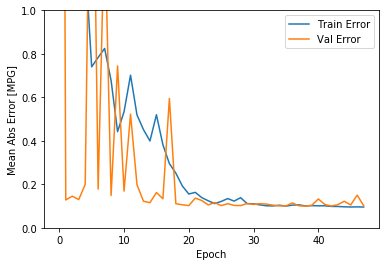

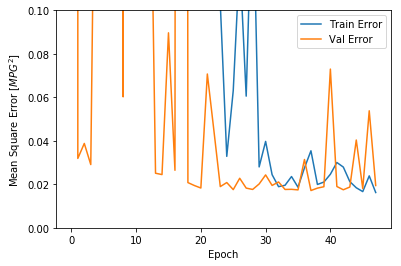

In [104]:
f1 = "./out/clinical_burden/"+ method + "/" + method +"_geneClinicalBurdern_MAE_EarlyStopping_v01.pdf"
f2 = "./out/clinical_burden/"+ method + "/" + method +"_geneClinicalBurdern_MSE_EarlyStopping_v01.pdf"
plot_history(history,f1,f2)

In [71]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("Testing set Mean Square Error: {:5.2f} MPG".format(mse))

Testing set Mean Square Error:  0.02 MPG


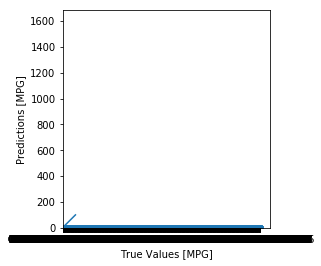

In [77]:
test_predictions = model.predict(test_dataset).flatten()



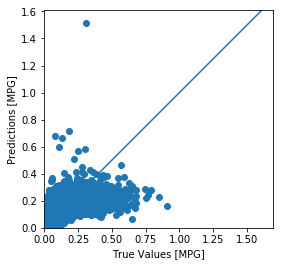

In [87]:
plt.scatter(test_labels.values.astype(float), test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

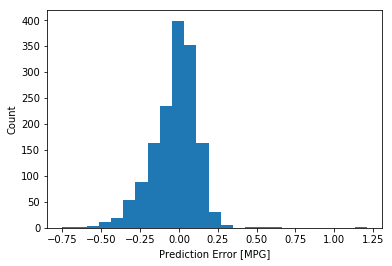

In [88]:
error = test_predictions - test_labels.values.astype(float)
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [86]:
type(test_predictions- test_labels.values.astype(float))

numpy.ndarray